https://doi.org/10.1016/j.nanoen.2020.104537

Initialise Global Dataset

In [330]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.linear_model import ElasticNetCV, Lasso, LassoCV
from sklearn.metrics import r2_score
from abess import LinearRegression
from genetic_selection import GeneticSelectionCV
import pandas as pd
import numpy as np

In [2]:
noMetalsNoMixes_Y = pd.read_csv('Data/WithPorphyrins/noMetalsNoMixes.csv', index_col=0)
noMetalsNoMixes_Y

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,...,Article year,Article year.1,Article electronic id,Article keywords,Molecule SMILE,Molecule keywords,Molecule spectrum absorption maxima,Molecule spectrum emission maxima,Molecule spectrum solvent,Dragon Name
0,687.0,10.79,0.70,5.19,Iodide_Triiodide,-,-,-,TiO2 (20 nm particle size),-,...,01/01/2012,Hong_2012,NaN,NaN,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,phenothiazine,439.0,576.0,CH2Cl2/MeOH (1:1),phenothiazine 5.19
7,678.0,13.20,0.67,6.00,Iodide_Triiodide,0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,01/01/2010,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,"coumarin, triphenylamine",465.0,640.0,dichloromethane,"coumarin, triphenylamine 6.0"
8,695.0,12.20,0.74,6.20,Iodide_Triiodide,0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,01/01/2010,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,"coumarin, triphenylamine",460.0,590.0,dichloromethane,"coumarin, triphenylamine 6.2"
9,800.0,9.00,0.76,5.50,Iodide_Triiodide,0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,01/01/2010,Alibabaei_2010,NaN,NaN,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,"coumarin, triphenylamine",454.0,525.0,dichloromethane,"coumarin, triphenylamine 5.5"
10,560.0,3.41,0.73,1.39,Iodide_Triiodide,0.16,-,-,TiO2 film,-,...,01/01/2014,Han_2014,NaN,NaN,CCN([C@@H]1C=Cc2c(C1)oc(=O)c(c2)c1ccc(cc1)c1cc...,coumarin,465.0,490.0,Acetonitrile-DMSO,coumarin 1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,740.0,14.56,0.68,7.39,Iodide_Triiodide,-,-,-,TiO2 film,-,...,01/01/2018,Ruangsupapichat_2018,NaN,NaN,C(CCCCC)N1C=2C=CC(=CC2C=2N(C=3C=CC(=CC3C21)/C=...,indoline,411.0,NaN,methanol,indoline 7.39
4422,651.0,9.93,0.70,4.52,Iodide_Triiodide,0.12 cm2,-,-,TiO2 film 14 um,296 nmol/cm2,...,01/01/2018,Liao_2018,NaN,NaN,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,phenothiazine,473.0,NaN,CH2Cl2/EtOH,phenothiazine 4.52
4423,667.0,12.85,0.71,6.09,Iodide_Triiodide,0.12 cm2,-,-,TiO2 film 14 um,224 nmol/cm2,...,01/01/2018,Liao_2018,NaN,NaN,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,phenothiazine,472.0,NaN,CH2Cl2/EtOH,phenothiazine 6.09
4424,659.0,12.46,0.69,5.65,Iodide_Triiodide,0.12 cm2,-,-,TiO2 film 14 um,187 nmol/cm2,...,01/01/2018,Liao_2018,NaN,NaN,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,phenothiazine,470.0,NaN,CH2Cl2/EtOH,phenothiazine 5.65


In [3]:
noMetalsNoMixes_X = pd.read_csv('Data/WithPorphyrins/noMetalsNoMixesDescs.txt', sep='\t', index_col=0)
noMetalsNoMixes_X = pd.DataFrame(noMetalsNoMixes_X.to_numpy(), index=noMetalsNoMixes_Y.index, columns=noMetalsNoMixes_X.columns)

noMetalsNoMixes_X=noMetalsNoMixes_X.drop(['NAME'], axis=1)
noMetalsNoMixes_X

C:\Users\clarkep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5,8,9,75,76,77,78,79,80,81,82,83,1088) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,SAdon,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,SAscore,PBF
0,907.17,8.807476,72.9777000000001,103.2868,76.9777,113.2306,0.708521359223302,1.002784,0.747356,1.099326,...,85.366686,1114.501661,460.140025,833.73,0.983361633413689,-4.791057,-5.121182,-5.231244,4.805908,na
7,987.28,8.092459,82.8650000000002,121.8466,87.5574,134.6392,0.679221311475412,0.998743,0.717684,1.1036,...,42.683343,1231.993355,508.292359,916.22,1.0052924143106,-6.849719,-7.422038,-7.653198,5.226973,na
8,905.15,7.87087,77.1511000000002,114.8866,81.1483,127.304,0.670879130434784,0.999014,0.705637,1.106991,...,42.683343,1143.538206,472.040248,857.05,0.995230652768589,-6.451551,-6.977027,-7.184766,5.06913,na
9,823.02,7.620556,71.4372000000001,107.9266,74.7392,119.9688,0.661455555555556,0.99932,0.69203,1.110822,...,42.683343,1055.083056,435.788138,797.88,0.983733748826621,-6.373654,-6.889966,-7.093123,4.91065,na
10,782.04,9.537073,57.0932999999999,83.6762,60.5512,90.5829,0.69625975609756,1.020441,0.738429,1.10467,...,85.366686,878.239203,363.311149,671.73,0.949852727644927,-3.700632,-3.902471,-3.94839,5.47316,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,564.74,7.240256,49.3736,77.854,52.0232,87.474,0.632995,0.998128,0.666964,1.121462,...,85.366686,739.833887,306.587659,543.280000000001,0.947015286513358,-4.081632,-4.328294,-4.396626,4.074303,na
4422,588.74,8.920303,47.071,66.3852,49.5002,72.2414,0.713197,1.005836,0.750003,1.094567,...,42.683343,703.488372,291.691956,514.760000000001,1.01085224926254,-5.021147,-5.37834,-5.501937,4.250177,na
4423,1722.36,8.787551,137.7816,195.7664,147.5008,214.557,0.702967,0.998808,0.752555,1.094679,...,128.050029,2075.016611,853.793693,1522.17999999998,1.0177183946457,-7.825031,-8.512094,-8.800625,6.671063,na
4424,1690.22,8.623571,136.837,196.2682,145.1144,215.1358,0.698148,1.001368,0.74038,1.097632,...,128.050029,2040.199336,839.524318,1502.73999999998,1.01440771929339,-6.638064,-7.185484,-7.404193,6.626615,na


Divide Dataset into Compound Families

Triphenylamine, Porphyrin, Phenothiazine, Indoline, Coumarin, Carbazole, Diphenylamine

In [4]:
colsY = list(noMetalsNoMixes_Y.columns)
colsX = list(noMetalsNoMixes_X.columns)

noMetalsNoMixes_Y_X = pd.concat([noMetalsNoMixes_Y[colsY[:]],noMetalsNoMixes_X[colsX[:]]], axis=1)

noMetalsNoMixes_Y_X.groupby(['Molecule keywords']).count().sort_values('PCE', ascending=False).head(10)

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,...,SAdon,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,SAscore,PBF
Molecule keywords,,,,,,,,,,,,,,,,,,,,,
triphenylamine,551,551,551,551,551,551,551,551,551,551,...,551,551,551,551,551,551,551,551,551,551
phenothiazine,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
porphyrin,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201
carbazole,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
indoline,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
coumarin,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
diphenylamine,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
imidazole,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
tetrahydroquinoline,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [5]:
triphDataset = noMetalsNoMixes_Y_X.loc[noMetalsNoMixes_Y_X['Molecule keywords']=="triphenylamine"].replace('na',np.NaN)
porphDataset = noMetalsNoMixes_Y_X.loc[noMetalsNoMixes_Y_X['Molecule keywords']=="porphyrin"].replace('na',np.NaN)
phenoDataset = noMetalsNoMixes_Y_X.loc[noMetalsNoMixes_Y_X['Molecule keywords']=="phenothiazine"].replace('na',np.NaN)
indolDataset = noMetalsNoMixes_Y_X.loc[noMetalsNoMixes_Y_X['Molecule keywords']=="indoline"].replace('na',np.NaN)
coumaDataset = noMetalsNoMixes_Y_X.loc[noMetalsNoMixes_Y_X['Molecule keywords']=="coumarin"].replace('na',np.NaN)
carbaDataset = noMetalsNoMixes_Y_X.loc[noMetalsNoMixes_Y_X['Molecule keywords']=="carbazole"].replace('na',np.NaN)
dipheDataset = noMetalsNoMixes_Y_X.loc[noMetalsNoMixes_Y_X['Molecule keywords']=="diphenylamine"].replace('na',np.NaN)

#dropping nan values dropped 10 features

In [6]:
triphDataset[colsX[:]]
    

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,SAdon,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,SAscore,PBF
670,455.54,8.134643,39.2349999999999,55.9124,40.7787,61.6505,0.700624999999999,0.998436,0.728191,1.100902,...,42.683343,577.807309,240.183323,416.96,1.01716600306542,-5.432124,-5.837668,-5.985440,3.570371,NaN
782,1052.54,6.834675,95.0317000000003,152.0388,102.5636,172.0337,0.617088961038963,0.987265,0.665997,1.117102,...,42.683343,1423.887043,586.937313,1056.63,0.95835788851312,-7.192882,-7.805574,-8.056920,5.128052,NaN
874,1071.66,7.390759,92.3628000000003,142.8535,101.1033,161.0030,0.636984827586209,0.985197,0.697264,1.110366,...,42.683343,1393.538206,574.499265,990.11,0.990394075667515,-9.533115,-10.421129,-10.810135,5.619172,NaN
906,704.92,8.196744,57.6613999999999,86.3414,60.9776,95.1514,0.670481395348836,1.00397,0.709042,1.106412,...,42.683343,852.524917,352.772507,626.42,0.974392324604265,-4.694608,-5.013385,-5.117774,4.473772,NaN
950,1384.23,7.402299,116.3901,184.6678,128.5467,208.3736,0.62240695187166,0.987528,0.687416,1.114297,...,42.683343,1774.235880,730.522902,1280.79,0.96526226576528,-7.713275,-8.387190,-8.669147,5.711286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,649.84,9.846061,47.3694,67.4108,49.9489,72.5833,0.717718,1.021376,0.756802,1.099747,...,103.377437,732.591362,303.619411,561.500000000001,0.956286315988875,-3.913659,-4.140560,-4.199010,4.748661,NaN
4364,446.58,9.113878,34.7758,49.4071,36.7615,53.7864,0.70971,1.008308,0.750235,1.097682,...,60.694094,531.478405,221.196068,392.69,0.98996452580806,-4.597607,-4.904972,-5.003655,3.753938,NaN
4402,766.05,7.027982,70.0506,107.501,74.8587,120.7159,0.642666,0.986248,0.686777,1.107485,...,42.683343,1030.681063,425.787321,750.720000000001,0.994869074993571,-8.468959,-9.231778,-9.558187,4.368666,NaN
4403,841.12,7.251034,76.072,114.6028,80.8644,128.2142,0.655793,0.987955,0.697107,1.105295,...,42.683343,1128.571429,465.906323,835.020000000001,0.988109786047062,-8.290466,-9.032286,-9.348196,4.617339,NaN


Divide Family Sets into Training (0.7) and Test (0.3) Sets

Triphenylamine + Porphyrin --> Kennard-Stone Algorithm

In [211]:
from kennard_stone import train_test_split

triph_X_train, triph_X_test, triph_Y_train, triph_Y_test = train_test_split(triphDataset[colsX[:]].dropna(axis=1, how='any'),triphDataset['PCE'],test_size=0.3)
porph_X_train, porph_X_test, porph_Y_train, porph_Y_test = train_test_split(porphDataset[colsX[:]].dropna(axis=1, how='any'),porphDataset['PCE'],test_size=0.3)
pheno_X_train, pheno_X_test, pheno_Y_train, pheno_Y_test = train_test_split(phenoDataset[colsX[:]].dropna(axis=1, how='any'),phenoDataset['PCE'],test_size=0.3)
indol_X_train, indol_X_test, indol_Y_train, indol_Y_test = train_test_split(indolDataset[colsX[:]].dropna(axis=1, how='any'),indolDataset['PCE'],test_size=0.3)
couma_X_train, couma_X_test, couma_Y_train, couma_Y_test = train_test_split(coumaDataset[colsX[:]].dropna(axis=1, how='any'),coumaDataset['PCE'],test_size=0.3)
carba_X_train, carba_X_test, carba_Y_train, carba_Y_test = train_test_split(carbaDataset[colsX[:]].dropna(axis=1, how='any'),carbaDataset['PCE'],test_size=0.3)
diphe_X_train, diphe_X_test, diphe_Y_train, diphe_Y_test = train_test_split(dipheDataset[colsX[:]].dropna(axis=1, how='any'),dipheDataset['PCE'],test_size=0.3)

In [213]:
triph_X_train.shape, porph_X_train.shape, pheno_X_train.shape, indol_X_train.shape, couma_X_train.shape, carba_X_train.shape, diphe_X_train.shape

((385, 1083),
 (140, 1076),
 (168, 1084),
 (77, 1091),
 (32, 1091),
 (97, 1091),
 (18, 1091))

 Phenothiazine, Indoline, Coumarin, Carbazole + Diphenylamine --> Modified k-medoid

Eliminate Intercorrelated Descriptors, Degree of Correlation --> 0.95, V-WSP Algorithm

In [214]:
def returnNextRow(rowDf, to_drop):
    max = -100
    nextRow='None'
    for i in range(len(rowDf.columns)):
        if (rowDf[rowDf.columns[i]][0] > max) and (rowDf.columns[i] not in to_drop) and (rowDf[rowDf.columns[i]][0] != np.NaN):
            max = rowDf[rowDf.columns[i]][0]
            nextRow = rowDf.columns[i]
    return nextRow

def getTo_dropOfRow(rowDf, to_drop=[], threshold=0.95):
    for i in range(len(rowDf.columns)):
        if (rowDf[rowDf.columns[i]][0] > threshold) and (rowDf[rowDf.columns[i]][0] != np.NaN) and (rowDf.columns[i] not in to_drop):
            to_drop.append(rowDf.columns[i])
    return to_drop

def vWSPFeatureSelect(rowName,corr_matrix,to_drop=[],thresh=0.95):
    if rowName=='None':
        return to_drop
    else:
        to_DropThisRow = getTo_dropOfRow(corr_matrix.loc[[rowName]], to_drop, threshold=thresh) #array of column names
        nextRow = returnNextRow(corr_matrix.loc[[rowName]], to_DropThisRow)
        updateTo_drop = to_DropThisRow
        return vWSPFeatureSelect(rowName=nextRow, corr_matrix=corr_matrix,to_drop=updateTo_drop, thresh=0.95)
    
def vWSP(X_train, threshold=0.95):
    cor_matrix = X_train.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    to_drop=vWSPFeatureSelect('MW', corr_matrix=upper_tri, thresh=threshold) #MW chosen as seed
    X_train_rm = X_train.drop(to_drop, axis=1)
    return X_train_rm
    

In [215]:
triph_X_train = vWSP(triph_X_train, threshold=0.9)
porph_X_train = vWSP(porph_X_train, threshold=0.9)
pheno_X_train = vWSP(pheno_X_train, threshold=0.9)
indol_X_train = vWSP(indol_X_train, threshold=0.9)
couma_X_train = vWSP(couma_X_train, threshold=0.9)
carba_X_train = vWSP(carba_X_train, threshold=0.9)
diphe_X_train = vWSP(diphe_X_train, threshold=0.9)
triph_X_train.shape, porph_X_train.shape, pheno_X_train.shape, indol_X_train.shape, couma_X_train.shape, carba_X_train.shape, diphe_X_train.shape

C:\Users\clarkep\AppData\Local\Temp/ipykernel_48908/461620231.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


((385, 1028),
 (140, 1011),
 (168, 1014),
 (77, 1017),
 (32, 1017),
 (97, 1014),
 (18, 1011))

Multistage Stepwise Regression to remove less important features: apparently the top 25 most important features

In [218]:
def scaleData(train_X):
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(train_X)
    scaled_df = pd.DataFrame(scaled_array, index=train_X.index, columns=train_X.columns)
    return scaled_df

In [289]:
triph_scaled_df_X_train = scaleData(triph_X_train)
porph_scaled_df_X_train = scaleData(porph_X_train)
pheno_scaled_df_X_train = scaleData(pheno_X_train)
indol_scaled_df_X_train = scaleData(indol_X_train)
couma_scaled_df_X_train = scaleData(couma_X_train)
carba_scaled_df_X_train = scaleData(carba_X_train)
diphe_scaled_df_X_train = scaleData(diphe_X_train)

print(len(triph_scaled_df_X_train.columns))

1028


Using Linear Models That Can Handle Sparse Data --> Lasso

In [285]:
lasso_triph = LassoCV(alphas=np.arange(0.1,2,0.1)).fit(triph_scaled_df_X_train,triph_Y_train)
lasso_porph = LassoCV(alphas=np.arange(0.1,2,0.1)).fit(porph_scaled_df_X_train,porph_Y_train)
lasso_pheno = LassoCV(alphas=np.arange(0.1,2,0.1)).fit(pheno_scaled_df_X_train,pheno_Y_train)
lasso_indol = LassoCV(alphas=np.arange(0.1,2,0.1)).fit(indol_scaled_df_X_train,indol_Y_train)
lasso_couma = LassoCV(alphas=np.arange(0.1,2,0.1)).fit(couma_scaled_df_X_train,couma_Y_train)
lasso_carba = LassoCV(alphas=np.arange(0.1,2,0.1)).fit(carba_scaled_df_X_train,carba_Y_train)
lasso_diphe = LassoCV(alphas=np.arange(0.1,2,0.1)).fit(diphe_scaled_df_X_train,diphe_Y_train)


importance_lasso_triph = np.abs(lasso_triph.coef_)
importance_lasso_porph = np.abs(lasso_porph.coef_)
importance_lasso_pheno = np.abs(lasso_pheno.coef_)
importance_lasso_indol = np.abs(lasso_indol.coef_)
importance_lasso_couma = np.abs(lasso_couma.coef_)
importance_lasso_carba = np.abs(lasso_carba.coef_)
importance_lasso_diphe = np.abs(lasso_diphe.coef_)


feature_names_triph = np.array(triph_scaled_df_X_train.columns)
feature_names_porph = np.array(porph_scaled_df_X_train.columns)
feature_names_pheno = np.array(pheno_scaled_df_X_train.columns)
feature_names_indol = np.array(indol_scaled_df_X_train.columns)
feature_names_couma = np.array(couma_scaled_df_X_train.columns)
feature_names_carba = np.array(carba_scaled_df_X_train.columns)
feature_names_diphe = np.array(diphe_scaled_df_X_train.columns)

lasso_triph.alpha_, lasso_porph.alpha_, lasso_pheno.alpha_,lasso_indol.alpha_,lasso_couma.alpha_,lasso_carba.alpha_,lasso_diphe.alpha_, len(feature_names_triph)

(0.1, 0.1, 0.1, 0.2, 0.5, 0.1, 0.1, 1028)

--> RFE --> Lasso

In [282]:
rfe_lasso_triph = RFE(estimator=Lasso(alpha=0.1), n_features_to_select=33,step=5)
rfe_lasso_triph = rfe_lasso_triph.fit(triph_scaled_df_X_train, triph_Y_train) 

rfe_lasso_triph.support_

print(f"Features selected by RFE with Lasso for Triphs:\n {feature_names_triph[rfe_lasso_triph.support_]}\n")
# slighty different than original

Features selected by RFE with Lasso for Triphs:
 ['nRCONHR' 'nCONN' 'nImidazoles' 'nFuranes' 'nPyridines' 'C-005' 'C-026'
 'C-029' 'C-033' 'C-035' 'H-047' 'H-051' 'Cl-090' 'SssssC' 'NsssCH'
 'minaaaC' 'minaaS' 'T(S..F)' 'B01[C-O]' 'B02[N-O]' 'B04[N-O]' 'B05[N-N]'
 'B05[O-S]' 'B06[N-O]' 'B07[C-N]' 'B07[O-S]' 'B07[S-Cl]' 'B08[S-S]'
 'B10[N-S]' 'F04[N-N]' 'F07[N-N]' 'F09[C-F]' 'F10[N-O]']



In [277]:
model_PLS_rfe_lasso_triph = PLSRegression(n_components=2)

model_PLS_rfe_lasso_triph.fit(triph_X_train[feature_names_triph[rfe_lasso_triph.support_]], triph_Y_train)

predictTriph_train_Y_rfe_lasso_PLS=model_PLS_rfe_lasso_triph.predict(triph_X_train[feature_names_triph[rfe_lasso_triph.support_]])

predictTriph_test_Y_rfe_lasso_PLS=model_PLS_rfe_lasso_triph.predict(triph_X_test[feature_names_triph[rfe_lasso_triph.support_]])

r2_train_PLS_rfe_lasso_triph = r2_score(triph_Y_train, predictTriph_train_Y_rfe_lasso_PLS)
r2_test_PLS_rfe_lasso_triph = r2_score(triph_Y_test, predictTriph_test_Y_rfe_lasso_PLS)

r2_train_PLS_rfe_lasso_triph, r2_test_PLS_rfe_lasso_triph

(0.49512958163056353, 0.16562979215735785)

--> Elastic Net

In [159]:
en_triph = ElasticNetCV(alphas=np.arange(0.1,2,0.1)).fit(triph_scaled_df_X_train,triph_Y_train)
en_porph = ElasticNetCV(alphas=np.arange(0.1,2,0.1)).fit(porph_scaled_df_X_train, porph_Y_train)
en_pheno = ElasticNetCV(alphas=np.arange(0.1,2,0.1)).fit(pheno_scaled_df_X_train, pheno_Y_train)
en_indol = ElasticNetCV(alphas=np.arange(0.1,2,0.1)).fit(indol_scaled_df_X_train, indol_Y_train)
en_couma = ElasticNetCV(alphas=np.arange(0.1,2,0.1)).fit(couma_scaled_df_X_train, couma_Y_train)
en_carba = ElasticNetCV(alphas=np.arange(0.1,2,0.1)).fit(carba_scaled_df_X_train, carba_Y_train)
en_diphe = ElasticNetCV(alphas=np.arange(0.1,2,0.1)).fit(diphe_scaled_df_X_train, diphe_Y_train)

importance_en_triph = np.abs(en_triph.coef_)
importance_en_porph = np.abs(en_porph.coef_)
importance_en_pheno = np.abs(en_pheno.coef_)
importance_en_indol = np.abs(en_indol.coef_)
importance_en_couma = np.abs(en_couma.coef_)
importance_en_carba = np.abs(en_carba.coef_)
importance_en_diphe = np.abs(en_diphe.coef_)

en_triph.alpha_, en_porph.alpha_ , en_pheno.alpha_, en_indol.alpha_, en_couma.alpha_, en_carba.alpha_, en_diphe.alpha_

C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10079937153935248, tolerance: 0.05777146805970149
  model = cd_fast.enet_coordinate_descent(
C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06750776675824, tolerance: 0.055294612148148146
  model = cd_fast.enet_coordinate_descent(


(0.1, 0.2, 0.1, 0.30000000000000004, 0.7000000000000001, 0.1, 0.1)

--> RFE --> Elastic Net

In [319]:
rfe_en_triph = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=30,step=5)
rfe_en_porph = RFE(estimator=ElasticNet(alpha=0.2), n_features_to_select=33,step=5)

rfe_en_triph = rfe_en_triph.fit(triph_scaled_df_X_train, triph_Y_train) 
rfe_en_porph = rfe_en_porph.fit(porph_scaled_df_X_train, porph_Y_train)



print(f"Features selected by RFE with ElasticNet for Triphs:\n {feature_names_triph[rfe_en_triph.support_]}\n")
print(f"Features selected by RFE with ElasticNet for Porphs:\n {feature_names_porph[rfe_en_porph.support_]}\n")

Features selected by RFE with ElasticNet for Triphs:
 ['nCIR' 'D/Dtr05' 'nRCONHR' 'nCONN' 'nImidazoles' 'nFuranes' 'C-011'
 'C-033' 'C-035' 'H-047' 'H-051' 'NsssCH' 'minaaaC' 'mintN' 'minaaS'
 'MaxsCH3' 'B01[C-O]' 'B04[N-N]' 'B04[N-O]' 'B05[O-S]' 'B06[N-O]'
 'B07[C-S]' 'B07[O-S]' 'B10[N-S]' 'F04[N-N]' 'F07[N-N]' 'F07[S-Cl]'
 'F09[C-S]' 'F09[C-F]' 'F10[N-O]']

Features selected by RFE with ElasticNet for Porphs:
 ['nR10' 'nR12' 'X3Av' 'Eta_D_epsiD' 'nR=Ct' 'nArCOOR' 'nArNR2' 'C-017'
 'C-040' 'N-071' 'StsC' 'SaaaC' 'minssCH2' 'MaxssCH2' 'MaxdsCH' 'B06[O-X]'
 'B07[C-X]' 'B08[O-X]' 'B09[O-X]' 'B09[S-X]' 'B10[N-X]' 'B10[O-O]'
 'F03[N-N]' 'F04[N-N]' 'F04[N-X]' 'F05[N-N]' 'F07[C-X]' 'F07[O-X]'
 'F08[O-X]' 'F09[C-X]' 'F10[N-O]' 'F10[N-X]' 'F10[O-O]']



In [320]:
model_PLS_rfe_en_triph = PLSRegression(n_components=2)
model_PLS_rfe_en_porph = PLSRegression(n_components=2)

model_PLS_rfe_en_triph.fit(triph_X_train[feature_names_triph[rfe_en_triph.support_]], triph_Y_train)
model_PLS_rfe_en_porph.fit(porph_X_train[feature_names_porph[rfe_en_porph.support_]], porph_Y_train)


predictTriph_train_Y_rfe_en_PLS=model_PLS_rfe_en_triph.predict(triph_X_train[feature_names_triph[rfe_en_triph.support_]])
predictPorph_train_Y_rfe_en_PLS=model_PLS_rfe_en_porph.predict(porph_X_train[feature_names_porph[rfe_en_porph.support_]])

predictTriph_test_Y_rfe_en_PLS=model_PLS_rfe_en_triph.predict(triph_X_test[feature_names_triph[rfe_en_triph.support_]])
predictPorph_test_Y_rfe_en_PLS=model_PLS_rfe_en_porph.predict(porph_X_test[feature_names_porph[rfe_en_porph.support_]])

r2_train_PLS_rfe_en_triph = r2_score(triph_Y_train, predictTriph_train_Y_rfe_en_PLS)
r2_train_PLS_rfe_en_porph = r2_score(porph_Y_train, predictPorph_train_Y_rfe_en_PLS)

r2_test_PLS_rfe_en_triph = r2_score(triph_Y_test, predictTriph_test_Y_rfe_en_PLS)
r2_test_PLS_rfe_en_porph = r2_score(porph_Y_test, predictPorph_test_Y_rfe_en_PLS)


(r2_train_PLS_rfe_en_triph, r2_test_PLS_rfe_en_triph), (r2_train_PLS_rfe_en_porph, r2_test_PLS_rfe_en_porph)

((0.4693474104372388, 0.20846605560442388),
 (0.6863036320076974, 0.5878397884483256))

--> GA --> Lasso

In [272]:
lasso = Lasso(alpha=0.1)

plsReg = PLSRegression(n_components=2)

GA_lasso = GeneticSelectionCV(
    estimator=plsReg,
    cv=10,
    verbose=1,
    scoring="r2",
    max_features=25,
    n_population=50,
    crossover_proba=0.5,
    mutation_proba=0.2,
    n_generations=40,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.05,
    tournament_size=3,
    n_gen_no_change=2,
    caching=True,
    n_jobs=-1)

GA_lasso = GA_lasso.fit(triph_scaled_df_X_train, triph_Y_train)


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	50    	[-0.035092 13.08      0.109093]	[ 0.051087  7.14098   0.094481]	[-0.212724  1.        0.039691]	[  0.087067  25.         0.53811 ]
1  	32    	[-1999.996035    25.48      2000.071062]	[ 4000.001983    21.144493  3999.964469]	[-10000.            3.            0.049616]	[     0.087067     77.        10000.      ]
2  	25    	[-1799.971168    26.72      1800.085374]	[ 3841.888051    19.886719  3841.834543]	[-10000.            9.            0.059361]	[     0.118117     85.        10000.      ]
3  	23    	[-999.944092   23.84     1000.09932 ]   	[ 3000.018636    15.974179  2999.966894]	[-10000.           11.            0.064233]	[     0.118117     76.        10000.      ]
4  	34    	[-2999.943066    31.68      3000.079349]	[ 4582.612967    23.30188   4582.523749]	[-10000.           12.            0.0

In [273]:
print(f"Features selected by RFE with Lasso for Triphs:\n {feature_names_triph[GA_lasso.support_]}\n")


Features selected by RFE with Lasso for Triphs:
 ['C-005' 'mindsCH' 'mintN' 'minsI' 'MaxsOH' 'B03[N-P]' 'B03[N-F]'
 'B04[O-S]' 'B05[O-X]' 'B06[C-P]' 'B07[C-S]' 'B08[N-O]' 'B10[S-Br]'
 'F02[C-P]' 'F04[C-I]' 'F04[S-P]' 'F05[S-Si]' 'F06[N-N]' 'F07[N-Cl]'
 'F07[S-F]' 'MLOGP']



In [274]:
model_PLS_GA_lasso_triph = PLSRegression(n_components=2)

model_PLS_GA_lasso_triph.fit(triph_X_train[feature_names_triph[GA_lasso.support_]], triph_Y_train)

predictTriph_train_Y_GA_lasso_PLS=model_PLS_GA_lasso_triph.predict(triph_X_train[feature_names_triph[GA_lasso.support_]])

predictTriph_test_Y_GA_lasso_PLS=model_PLS_GA_lasso_triph.predict(triph_X_test[feature_names_triph[GA_lasso.support_]])

r2_train_PLS_GA_lasso_triph = r2_score(triph_Y_train, predictTriph_train_Y_GA_lasso_PLS)
r2_test_PLS_GA_lasso_triph = r2_score(triph_Y_test, predictTriph_test_Y_GA_lasso_PLS)

r2_train_PLS_GA_lasso_triph, r2_test_PLS_GA_lasso_triph

(0.23878189087668722, 0.00837774860692353)

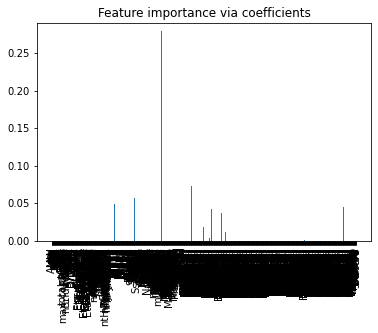

In [232]:
plt.bar(height=importance, x=feature_names)
plt.ylim(0.00, 0.29)
plt.xticks(range(len(feature_names)),rotation='vertical')
plt.title("Feature importance via coefficients")
plt.show()


In [233]:
threshold_lasso_triph = np.sort(importance_lasso_triph)[-27]+0.0001
threshold_lasso_porph = np.sort(importance_lasso_porph)[-30]+0.0001
threshold_lasso_pheno = np.sort(importance_lasso_pheno)[-30]+0.0001
threshold_lasso_indol = np.sort(importance_lasso_indol)[-30]+0.0001
threshold_lasso_couma = np.sort(importance_lasso_couma)[-30]+0.0001
threshold_lasso_carba = np.sort(importance_lasso_carba)[-30]+0.0001
threshold_lasso_diphe = np.sort(importance_lasso_diphe)[-30]+0.0001

sfm_lasso_triph = SelectFromModel(lasso_triph, threshold=threshold_lasso_triph).fit(triph_scaled_df_X_train,triph_Y_train)
sfm_lasso_porph = SelectFromModel(lasso_porph, threshold=threshold_lasso_porph).fit(porph_scaled_df_X_train,porph_Y_train)
sfm_lasso_pheno = SelectFromModel(lasso_pheno, threshold=threshold_lasso_pheno).fit(pheno_scaled_df_X_train,pheno_Y_train)
sfm_lasso_indol = SelectFromModel(lasso_indol, threshold=threshold_lasso_indol).fit(indol_scaled_df_X_train,indol_Y_train)
sfm_lasso_couma = SelectFromModel(lasso_couma, threshold=threshold_lasso_couma).fit(couma_scaled_df_X_train,couma_Y_train)
sfm_lasso_carba = SelectFromModel(lasso_carba, threshold=threshold_lasso_carba).fit(carba_scaled_df_X_train,carba_Y_train)
sfm_lasso_diphe = SelectFromModel(lasso_diphe, threshold=threshold_lasso_diphe).fit(diphe_scaled_df_X_train,diphe_Y_train)


print(f"Features selected by Lasso for Triphs:\n {feature_names_triph[sfm_lasso_triph.get_support()]}\n")
print(f"Features selected by Lasso for Porphs:\n {feature_names_porph[sfm_lasso_porph.get_support()]}\n")
print(f"Features selected by Lasso for Phenos:\n {feature_names_pheno[sfm_lasso_pheno.get_support()]}\n")
print(f"Features selected by Lasso for Indols:\n {feature_names_indol[sfm_lasso_indol.get_support()]}\n")
print(f"Features selected by Lasso for Coumas:\n {feature_names_couma[sfm_lasso_couma.get_support()]}\n")
print(f"Features selected by Lasso for Carbas:\n {feature_names_carba[sfm_lasso_carba.get_support()]}\n")
print(f"Features selected by Lasso for Diphes:\n {feature_names_diphe[sfm_lasso_diphe.get_support()]}\n")

Features selected by Lasso for Triphs:
 ['nRCONHR' 'nImidazoles' 'nFuranes' 'nPyridines' 'C-005' 'C-026' 'C-033'
 'C-035' 'H-051' 'Cl-090' 'SssssC' 'NsssCH' 'minaaaC' 'minaaS' 'B01[C-O]'
 'B02[N-O]' 'B04[N-O]' 'B05[O-S]' 'B06[N-O]' 'B07[O-S]' 'B07[S-Cl]'
 'B10[N-S]' 'F04[N-N]' 'F07[N-N]' 'F09[C-F]' 'F10[N-O]']

Features selected by Lasso for Porphs:
 ['nR10' 'nR12' 'X3Av' 'Eta_D_epsiD' 'nR=Ct' 'nArCOOR' 'nArNR2' 'C-040'
 'N-071' 'StsC' 'SaaaC' 'SaaO' 'minssCH2' 'MaxdsCH' 'B06[O-X]' 'B07[C-X]'
 'B08[O-X]' 'B09[O-O]' 'B09[O-X]' 'B09[S-X]' 'B10[N-X]' 'B10[O-O]'
 'F03[N-N]' 'F04[N-X]' 'F05[N-N]' 'F07[O-X]' 'F09[C-X]' 'F10[N-O]'
 'F10[O-O]']

Features selected by Lasso for Phenos:
 ['X1Av' 'nCt' 'nR#C-' 'nArCO' 'nPyridines' 'C-003' 'SsssN' 'mindssC'
 'minssS' 'MaxssO' 'B04[N-O]' 'B04[O-S]' 'B06[N-N]' 'B06[O-O]' 'B07[C-S]'
 'B07[N-O]' 'B07[N-S]' 'B07[O-S]' 'B08[C-O]' 'B08[O-O]' 'B09[C-S]'
 'B09[N-S]' 'B09[S-S]' 'F05[C-S]' 'F05[S-S]' 'F09[O-S]' 'F09[S-S]'
 'F10[N-O]' 'F10[S-S]']

Features sel

In [234]:
threshold_en_triph = np.sort(importance_en_triph)[-60]+0.0001
threshold_en_porph = np.sort(importance_en_porph)[-60]+0.0001
threshold_en_pheno = np.sort(importance_en_pheno)[-60]+0.0001
threshold_en_indol = np.sort(importance_en_indol)[-60]+0.0001
threshold_en_couma = np.sort(importance_en_couma)[-60]+0.0001
threshold_en_carba = np.sort(importance_en_carba)[-60]+0.0001
threshold_en_diphe = np.sort(importance_en_diphe)[-60]+0.0001



sfm_en_triph = SelectFromModel(en_triph, threshold=threshold_en_triph).fit(triph_scaled_df_X_train,triph_Y_train)
sfm_en_porph = SelectFromModel(en_porph, threshold=threshold_en_porph).fit(porph_scaled_df_X_train,porph_Y_train)
sfm_en_pheno = SelectFromModel(en_pheno, threshold=threshold_en_pheno).fit(pheno_scaled_df_X_train,pheno_Y_train)
sfm_en_indol = SelectFromModel(en_indol, threshold=threshold_en_indol).fit(indol_scaled_df_X_train,indol_Y_train)
sfm_en_couma = SelectFromModel(en_couma, threshold=threshold_en_couma).fit(couma_scaled_df_X_train,couma_Y_train)
sfm_en_carba = SelectFromModel(en_carba, threshold=threshold_en_carba).fit(carba_scaled_df_X_train,carba_Y_train)
sfm_en_diphe = SelectFromModel(en_diphe, threshold=threshold_en_diphe).fit(diphe_scaled_df_X_train,diphe_Y_train)


print(f"Features selected by ElasticNet for Triphs:\n {feature_names_triph[sfm_en_triph.get_support()]}\n")
print(f"Features selected by ElasticNet for Porphs:\n {feature_names_porph[sfm_en_porph.get_support()]}\n")
print(f"Features selected by ElasticNet for Phenos:\n {feature_names_pheno[sfm_en_pheno.get_support()]}\n")
print(f"Features selected by ElasticNet for Indols:\n {feature_names_indol[sfm_en_indol.get_support()]}\n")
print(f"Features selected by ElasticNet for Coumas:\n {feature_names_couma[sfm_en_couma.get_support()]}\n")
print(f"Features selected by ElasticNet for Carbas:\n {feature_names_carba[sfm_en_carba.get_support()]}\n")
print(f"Features selected by ElasticNet for Diphes:\n {feature_names_diphe[sfm_en_diphe.get_support()]}\n")

C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1006210609297824, tolerance: 0.05777146805970149
  model = cd_fast.enet_coordinate_descent(
C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06754686811382271, tolerance: 0.055294612148148146
  model = cd_fast.enet_coordinate_descent(


Features selected by ElasticNet for Triphs:
 ['N%' 'nCIR' 'D/Dtr05' 'Eta_sh_p' 'nCrt' 'nArSCN' 'nArCOOH' 'nRCONHR'
 'nCONN' 'nImidazoles' 'nFuranes' 'C-005' 'C-011' 'C-029' 'C-033' 'C-035'
 'H-047' 'H-048' 'H-051' 'H-054' 'N-071' 'SssssC' 'NsssCH' 'NssO'
 'minaaaC' 'minsssN' 'mintN' 'minaaS' 'MaxsCH3' 'MaxaaaC' 'T(N..S)'
 'B01[C-O]' 'B02[N-O]' 'B02[O-O]' 'B02[O-S]' 'B03[O-O]' 'B04[N-N]'
 'B04[N-O]' 'B04[S-S]' 'B05[N-N]' 'B05[O-S]' 'B06[N-O]' 'B06[O-S]'
 'B07[C-S]' 'B07[O-S]' 'B07[S-S]' 'B07[S-Cl]' 'B08[C-N]' 'B10[C-N]'
 'B10[N-S]' 'F03[N-S]' 'F04[N-N]' 'F07[N-N]' 'F07[S-Cl]' 'F08[O-S]'
 'F09[C-S]' 'F09[C-F]' 'F09[S-S]' 'F10[C-S]' 'F10[C-F]' 'F10[N-O]']

Features selected by ElasticNet for Porphs:
 ['nCIR' 'nR10' 'nR12' 'X1Av' 'X3Av' 'Eta_D_epsiD' 'nCrq' 'nR=Ct' 'nR#C-'
 'nArCOOR' 'nArNR2' 'nHDon' 'C-017' 'C-022' 'C-040' 'H-050' 'N-071'
 'N-072' 'SsssCH' 'StsC' 'SaaaC' 'SaaO' 'minsCH3' 'minssCH2' 'mindsCH'
 'minaasN' 'minaaO' 'MaxsCH3' 'MaxssCH2' 'MaxdsCH' 'MaxaaO' 'B02[N-O]'
 'B03[N-O]

(TEST TO SEE IF ONLY THESE FEATURES ARE ENOUGH FOR DECENT MODEL)

In [235]:
porph_X_train[feature_names_porph[sfm_en_porph.get_support()]]

,nCIR,nR10,nR12,X1Av,X3Av,Eta_D_epsiD,nCrq,nR=Ct,nR#C-,nArCOOR,...,F07[C-X],F07[O-X],F08[C-X],F08[N-S],F08[O-X],F09[C-X],F09[O-S],F10[N-O],F10[N-X],F10[O-O]
3275,42,2,0,0.307155,0.086400,0.010814,0,0,4,0,...,8,0,14,0,0,2,0,0,0,0
3549,46,3,0,0.312597,0.087512,0.005961,0,0,4,0,...,10,0,17,0,0,4,0,4,0,0
3649,40,2,0,0.357951,0.102631,0.004795,0,0,4,0,...,10,0,8,0,0,6,0,4,1,0
3680,46,4,0,0.358484,0.105644,0.004036,0,4,4,0,...,10,0,8,2,0,6,0,4,1,0
3686,49,4,0,0.353114,0.104330,0.003773,0,4,4,0,...,10,0,8,4,0,9,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,59,2,0,0.329803,0.097329,0.003889,0,1,0,0,...,1,0,7,5,0,14,0,0,0,0
3616,40,2,0,0.373276,0.119287,0.013326,0,0,12,0,...,4,0,4,0,0,0,0,5,0,0
3406,40,2,0,0.285135,0.078969,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3383,121,6,0,0.311164,0.086420,0.007324,0,0,0,0,...,18,0,14,0,5,19,0,4,0,0


PLS with Lasso Coefficient Selected Features

In [236]:
model_PLS_lasso_triph = PLSRegression(n_components=2)
model_PLS_lasso_porph = PLSRegression(n_components=2)
model_PLS_lasso_pheno = PLSRegression(n_components=2)
model_PLS_lasso_indol = PLSRegression(n_components=2)
model_PLS_lasso_couma = PLSRegression(n_components=2)
model_PLS_lasso_carba = PLSRegression(n_components=2)
model_PLS_lasso_diphe = PLSRegression(n_components=2)

model_PLS_lasso_triph.fit(triph_X_train[feature_names_triph[sfm_lasso_triph.get_support()]], triph_Y_train)
model_PLS_lasso_porph.fit(porph_X_train[feature_names_porph[sfm_lasso_porph.get_support()]], porph_Y_train)
model_PLS_lasso_pheno.fit(pheno_X_train[feature_names_pheno[sfm_lasso_pheno.get_support()]], pheno_Y_train)
model_PLS_lasso_indol.fit(indol_X_train[feature_names_indol[sfm_lasso_indol.get_support()]], indol_Y_train)
model_PLS_lasso_couma.fit(couma_X_train[feature_names_couma[sfm_lasso_couma.get_support()]], couma_Y_train)
model_PLS_lasso_carba.fit(carba_X_train[feature_names_carba[sfm_lasso_carba.get_support()]], carba_Y_train)
model_PLS_lasso_diphe.fit(diphe_X_train[feature_names_diphe[sfm_lasso_diphe.get_support()]], diphe_Y_train)

predictTriph_train_Y_lassoPLS=model_PLS_lasso_triph.predict(triph_X_train[feature_names_triph[sfm_lasso_triph.get_support()]])
predictPorph_train_Y_lassoPLS=model_PLS_lasso_porph.predict(porph_X_train[feature_names_porph[sfm_lasso_porph.get_support()]])
predictPheno_train_Y_lassoPLS=model_PLS_lasso_pheno.predict(pheno_X_train[feature_names_pheno[sfm_lasso_pheno.get_support()]])
predictIndol_train_Y_lassoPLS=model_PLS_lasso_indol.predict(indol_X_train[feature_names_indol[sfm_lasso_indol.get_support()]])
predictCouma_train_Y_lassoPLS=model_PLS_lasso_couma.predict(couma_X_train[feature_names_couma[sfm_lasso_couma.get_support()]])
predictCarba_train_Y_lassoPLS=model_PLS_lasso_carba.predict(carba_X_train[feature_names_carba[sfm_lasso_carba.get_support()]])
predictDiphe_train_Y_lassoPLS=model_PLS_lasso_diphe.predict(diphe_X_train[feature_names_diphe[sfm_lasso_diphe.get_support()]])

predictTriph_test_Y_lassoPLS=model_PLS_lasso_triph.predict(triph_X_test[feature_names_triph[sfm_lasso_triph.get_support()]])
predictPorph_test_Y_lassoPLS=model_PLS_lasso_porph.predict(porph_X_test[feature_names_porph[sfm_lasso_porph.get_support()]])
predictPheno_test_Y_lassoPLS=model_PLS_lasso_pheno.predict(pheno_X_test[feature_names_pheno[sfm_lasso_pheno.get_support()]])
predictIndol_test_Y_lassoPLS=model_PLS_lasso_indol.predict(indol_X_test[feature_names_indol[sfm_lasso_indol.get_support()]])
predictCouma_test_Y_lassoPLS=model_PLS_lasso_couma.predict(couma_X_test[feature_names_couma[sfm_lasso_couma.get_support()]])
predictCarba_test_Y_lassoPLS=model_PLS_lasso_carba.predict(carba_X_test[feature_names_carba[sfm_lasso_carba.get_support()]])
predictDiphe_test_Y_lassoPLS=model_PLS_lasso_diphe.predict(diphe_X_test[feature_names_diphe[sfm_lasso_diphe.get_support()]])

# Correlation scores for Triph
r2_train_PLS_lasso_triph = r2_score(triph_Y_train, predictTriph_train_Y_lassoPLS)
r2_test_PLS_lasso_triph = r2_score(triph_Y_test, predictTriph_test_Y_lassoPLS)

# Correlation scores for Porph
r2_train_PLS_lasso_porph = r2_score(porph_Y_train, predictPorph_train_Y_lassoPLS)
r2_test_PLS_lasso_porph = r2_score(porph_Y_test, predictPorph_test_Y_lassoPLS)

# Correlation scores for Pheno
r2_train_PLS_lasso_pheno = r2_score(pheno_Y_train, predictPheno_train_Y_lassoPLS)
r2_test_PLS_lasso_pheno = r2_score(pheno_Y_test, predictPheno_test_Y_lassoPLS)

# Correlation scores for Indol
r2_train_PLS_lasso_indol = r2_score(indol_Y_train, predictIndol_train_Y_lassoPLS)
r2_test_PLS_lasso_indol = r2_score(indol_Y_test, predictIndol_test_Y_lassoPLS)

# Correlation scores for Couma
r2_train_PLS_lasso_couma = r2_score(couma_Y_train, predictCouma_train_Y_lassoPLS)
r2_test_PLS_lasso_couma = r2_score(couma_Y_test, predictCouma_test_Y_lassoPLS)

# Correlation scores for Carba
r2_train_PLS_lasso_carba = r2_score(carba_Y_train, predictCarba_train_Y_lassoPLS)
r2_test_PLS_lasso_carba = r2_score(carba_Y_test, predictCarba_test_Y_lassoPLS)

# Correlation scores for Diphe
r2_train_PLS_lasso_diphe = r2_score(diphe_Y_train, predictDiphe_train_Y_lassoPLS)
r2_test_PLS_lasso_diphe = r2_score(diphe_Y_test, predictDiphe_test_Y_lassoPLS)

print(f"Using Lasso for feature selection and then PLS\nCorrelation scores for Triphs:\nTrain --> {r2_train_PLS_lasso_triph}\nTest --> {r2_test_PLS_lasso_triph}\n")
print(f"Using Lasso for feature selection and then PLS\nCorrelation scores for Porphs:\nTrain --> {r2_train_PLS_lasso_porph}\nTest --> {r2_test_PLS_lasso_porph}\n")
print(f"Using Lasso for feature selection and then PLS\nCorrelation scores for Phenos:\nTrain --> {r2_train_PLS_lasso_pheno}\nTest --> {r2_test_PLS_lasso_pheno}\n")
print(f"Using Lasso for feature selection and then PLS\nCorrelation scores for Indols:\nTrain --> {r2_train_PLS_lasso_indol}\nTest --> {r2_test_PLS_lasso_indol}\n")
print(f"Using Lasso for feature selection and then PLS\nCorrelation scores for Coumas:\nTrain --> {r2_train_PLS_lasso_couma}\nTest --> {r2_test_PLS_lasso_couma}\n")
print(f"Using Lasso for feature selection and then PLS\nCorrelation scores for Carbas:\nTrain --> {r2_train_PLS_lasso_carba}\nTest --> {r2_test_PLS_lasso_carba}\n")
print(f"Using Lasso for feature selection and then PLS\nCorrelation scores for Diphes:\nTrain --> {r2_train_PLS_lasso_diphe}\nTest --> {r2_test_PLS_lasso_diphe}\n")


Using Lasso for feature selection and then PLS
Correlation scores for Triphs:
Train --> 0.4725479416853241
Test --> 0.10701870962806936

Using Lasso for feature selection and then PLS
Correlation scores for Porphs:
Train --> 0.7121549184119558
Test --> 0.6023529710189861

Using Lasso for feature selection and then PLS
Correlation scores for Phenos:
Train --> 0.6609573928045156
Test --> 0.2679822161236285

Using Lasso for feature selection and then PLS
Correlation scores for Indols:
Train --> 0.6957511080156111
Test --> 0.18417337710941462

Using Lasso for feature selection and then PLS
Correlation scores for Coumas:
Train --> 0.765661273880694
Test --> -0.025898806828425158

Using Lasso for feature selection and then PLS
Correlation scores for Carbas:
Train --> 0.7941256944858704
Test --> 0.45801028236569763

Using Lasso for feature selection and then PLS
Correlation scores for Diphes:
Train --> 0.9822556358683949
Test --> 0.5816216991273446



PLS with ElasticNet Coefficient Selected Features

In [237]:
model_PLS_en_triph = PLSRegression(n_components=2)
model_PLS_en_porph = PLSRegression(n_components=2)
model_PLS_en_pheno = PLSRegression(n_components=2)
model_PLS_en_indol = PLSRegression(n_components=2)
model_PLS_en_couma = PLSRegression(n_components=2)
model_PLS_en_carba = PLSRegression(n_components=2)
model_PLS_en_diphe = PLSRegression(n_components=2)

model_PLS_en_triph.fit(triph_X_train[feature_names_triph[sfm_en_triph.get_support()]], triph_Y_train)
model_PLS_en_porph.fit(porph_X_train[feature_names_porph[sfm_en_porph.get_support()]], porph_Y_train)
model_PLS_en_pheno.fit(pheno_X_train[feature_names_pheno[sfm_en_pheno.get_support()]], pheno_Y_train)
model_PLS_en_indol.fit(indol_X_train[feature_names_indol[sfm_en_indol.get_support()]], indol_Y_train)
model_PLS_en_couma.fit(couma_X_train[feature_names_couma[sfm_en_couma.get_support()]], couma_Y_train)
model_PLS_en_carba.fit(carba_X_train[feature_names_carba[sfm_en_carba.get_support()]], carba_Y_train)
model_PLS_en_diphe.fit(diphe_X_train[feature_names_diphe[sfm_en_diphe.get_support()]], diphe_Y_train)

predictTriph_train_Y_enPLS=model_PLS_en_triph.predict(triph_X_train[feature_names_triph[sfm_en_triph.get_support()]])
predictPorph_train_Y_enPLS=model_PLS_en_porph.predict(porph_X_train[feature_names_porph[sfm_en_porph.get_support()]])
predictPheno_train_Y_enPLS=model_PLS_en_pheno.predict(pheno_X_train[feature_names_pheno[sfm_en_pheno.get_support()]])
predictIndol_train_Y_enPLS=model_PLS_en_indol.predict(indol_X_train[feature_names_indol[sfm_en_indol.get_support()]])
predictCouma_train_Y_enPLS=model_PLS_en_couma.predict(couma_X_train[feature_names_couma[sfm_en_couma.get_support()]])
predictCarba_train_Y_enPLS=model_PLS_en_carba.predict(carba_X_train[feature_names_carba[sfm_en_carba.get_support()]])
predictDiphe_train_Y_enPLS=model_PLS_en_diphe.predict(diphe_X_train[feature_names_diphe[sfm_en_diphe.get_support()]])

predictTriph_test_Y_enPLS=model_PLS_en_triph.predict(triph_X_test[feature_names_triph[sfm_en_triph.get_support()]])
predictPorph_test_Y_enPLS=model_PLS_en_porph.predict(porph_X_test[feature_names_porph[sfm_en_porph.get_support()]])
predictPheno_test_Y_enPLS=model_PLS_en_pheno.predict(pheno_X_test[feature_names_pheno[sfm_en_pheno.get_support()]])
predictIndol_test_Y_enPLS=model_PLS_en_indol.predict(indol_X_test[feature_names_indol[sfm_en_indol.get_support()]])
predictCouma_test_Y_enPLS=model_PLS_en_couma.predict(couma_X_test[feature_names_couma[sfm_en_couma.get_support()]])
predictCarba_test_Y_enPLS=model_PLS_en_carba.predict(carba_X_test[feature_names_carba[sfm_en_carba.get_support()]])
predictDiphe_test_Y_enPLS=model_PLS_en_diphe.predict(diphe_X_test[feature_names_diphe[sfm_en_diphe.get_support()]])

# Correlation scores for Triph
r2_train_PLS_en_triph = r2_score(triph_Y_train, predictTriph_train_Y_enPLS)
r2_test_PLS_en_triph = r2_score(triph_Y_test, predictTriph_test_Y_enPLS)

# Correlation scores for Porph
r2_train_PLS_en_porph = r2_score(porph_Y_train, predictPorph_train_Y_enPLS)
r2_test_PLS_en_porph = r2_score(porph_Y_test, predictPorph_test_Y_enPLS)

# Correlation scores for Pheno
r2_train_PLS_en_pheno = r2_score(pheno_Y_train, predictPheno_train_Y_enPLS)
r2_test_PLS_en_pheno = r2_score(pheno_Y_test, predictPheno_test_Y_enPLS)

# Correlation scores for Indol
r2_train_PLS_en_indol = r2_score(indol_Y_train, predictIndol_train_Y_enPLS)
r2_test_PLS_en_indol = r2_score(indol_Y_test, predictIndol_test_Y_enPLS)

# Correlation scores for Couma
r2_train_PLS_en_couma = r2_score(couma_Y_train, predictCouma_train_Y_enPLS)
r2_test_PLS_en_couma = r2_score(couma_Y_test, predictCouma_test_Y_enPLS)

# Correlation scores for Carba
r2_train_PLS_en_carba = r2_score(carba_Y_train, predictCarba_train_Y_enPLS)
r2_test_PLS_en_carba = r2_score(carba_Y_test, predictCarba_test_Y_enPLS)

# Correlation scores for Diphe
r2_train_PLS_en_diphe = r2_score(diphe_Y_train, predictDiphe_train_Y_enPLS)
r2_test_PLS_en_diphe = r2_score(diphe_Y_test, predictDiphe_test_Y_enPLS)

print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Triphs:\nTrain --> {r2_train_PLS_en_triph}\nTest --> {r2_test_PLS_en_triph}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Porphs:\nTrain --> {r2_train_PLS_en_porph}\nTest --> {r2_test_PLS_en_porph}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Phenos:\nTrain --> {r2_train_PLS_en_pheno}\nTest --> {r2_test_PLS_en_pheno}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Indols:\nTrain --> {r2_train_PLS_en_indol}\nTest --> {r2_test_PLS_en_indol}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Coumas:\nTrain --> {r2_train_PLS_en_couma}\nTest --> {r2_test_PLS_en_couma}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Carbas:\nTrain --> {r2_train_PLS_en_carba}\nTest --> {r2_test_PLS_en_carba}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Diphes:\nTrain --> {r2_train_PLS_en_diphe}\nTest --> {r2_test_PLS_en_diphe}\n")

Using ElasticNet for feature selection and then PLS
Correlation scores for Triphs:
Train --> 0.4956504624392484
Test --> 0.19253640149953277

Using ElasticNet for feature selection and then PLS
Correlation scores for Porphs:
Train --> 0.6866378032481633
Test --> 0.6411348126892974

Using ElasticNet for feature selection and then PLS
Correlation scores for Phenos:
Train --> 0.698628247315239
Test --> 0.22699707399072766

Using ElasticNet for feature selection and then PLS
Correlation scores for Indols:
Train --> 0.7097461721312008
Test --> 0.12826636798810986

Using ElasticNet for feature selection and then PLS
Correlation scores for Coumas:
Train --> 0.8357879940507265
Test --> 0.02674612502602669

Using ElasticNet for feature selection and then PLS
Correlation scores for Carbas:
Train --> 0.7923624628844778
Test --> 0.3928213043923524

Using ElasticNet for feature selection and then PLS
Correlation scores for Diphes:
Train --> 0.9890722922527317
Test --> 0.5601422947311758



In [238]:

r2_train = r2_score(triph_Y_train, train_predict_Y)
r2_test = r2_score(triph_Y_test, test_predict_Y)

r2_train, r2_test

(0.4621346877808217, 0.1477664882807458)

Stepwise Regression (ElasticNet): RFE

60 Features

In [323]:
# 0.1, 0.2, 0.1, 0.30000000000000004, 0.7000000000000001, 0.1, 0.1
rfe1_en_triph = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=60,step=6)
rfe1_en_porph = RFE(estimator=ElasticNet(alpha=0.2), n_features_to_select=60,step=6)
rfe1_en_pheno = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=60,step=6)
rfe1_en_indol = RFE(estimator=ElasticNet(alpha=0.3), n_features_to_select=60,step=6)
rfe1_en_couma = RFE(estimator=ElasticNet(alpha=0.7), n_features_to_select=60,step=6)
rfe1_en_carba = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=60,step=6)
rfe1_en_diphe = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=60,step=6)

rfe1_en_triph = rfe1_en_triph.fit(triph_scaled_df_X_train, triph_Y_train) 
rfe1_en_porph = rfe1_en_porph.fit(porph_scaled_df_X_train, porph_Y_train)
rfe1_en_pheno = rfe1_en_pheno.fit(pheno_scaled_df_X_train, pheno_Y_train)
rfe1_en_indol = rfe1_en_indol.fit(indol_scaled_df_X_train, indol_Y_train)
rfe1_en_couma = rfe1_en_couma.fit(couma_scaled_df_X_train, couma_Y_train)
rfe1_en_carba = rfe1_en_carba.fit(carba_scaled_df_X_train, carba_Y_train)
rfe1_en_diphe = rfe1_en_diphe.fit(diphe_scaled_df_X_train, diphe_Y_train)

print(f"60 Features selected by first RFE with ElasticNet for Triphs:\n {feature_names_triph[rfe1_en_triph.support_]}\n")
print(f"60 Features selected by first RFE with ElasticNet for Porphs:\n {feature_names_porph[rfe1_en_porph.support_]}\n")
print(f"60 Features selected by first RFE with ElasticNet for Phenos:\n {feature_names_pheno[rfe1_en_pheno.support_]}\n")

60 Features selected by first RFE with ElasticNet for Triphs:
 ['N%' 'nCIR' 'D/Dtr05' 'nCrt' 'nArSCN' 'nRCONHR' 'nCONN' 'nImidazoles'
 'nFuranes' 'nPyrazines' 'C-005' 'C-011' 'C-033' 'C-035' 'H-047' 'H-051'
 'H-054' 'SssssC' 'NsssCH' 'NssO' 'minaaaC' 'minsssN' 'mintN' 'minaaS'
 'MaxsCH3' 'MaxaaaC' 'T(N..S)' 'T(S..F)' 'B01[C-O]' 'B01[N-N]' 'B02[N-Cl]'
 'B02[O-S]' 'B03[O-O]' 'B04[N-N]' 'B04[N-O]' 'B04[S-S]' 'B05[N-N]'
 'B05[O-S]' 'B06[N-O]' 'B06[O-S]' 'B07[C-S]' 'B07[O-S]' 'B07[S-S]'
 'B07[S-Cl]' 'B08[C-N]' 'B10[C-N]' 'B10[N-S]' 'B10[S-Cl]' 'F03[N-S]'
 'F04[N-N]' 'F07[N-N]' 'F07[S-Cl]' 'F08[O-S]' 'F09[C-S]' 'F09[C-F]'
 'F09[S-S]' 'F10[C-C]' 'F10[C-S]' 'F10[C-F]' 'F10[N-O]']

60 Features selected by first RFE with ElasticNet for Porphs:
 ['nCIR' 'nR10' 'nR12' 'X1Av' 'X3Av' 'Eta_D_epsiD' 'nCrq' 'nR=Ct' 'nR#C-'
 'nArCOOR' 'nArNR2' 'nHDon' 'C-017' 'C-022' 'C-040' 'H-050' 'N-071'
 'N-072' 'SsssCH' 'StsC' 'SaaaC' 'SaaO' 'minssCH2' 'mindsCH' 'minaasN'
 'minaaO' 'MaxssCH2' 'MaxdsCH' 'MaxaaO' 'B0

25 Features

In [328]:
rfe2_en_triph = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=25,step=1)
rfe2_en_porph = RFE(estimator=ElasticNet(alpha=0.2), n_features_to_select=25,step=1)
rfe2_en_pheno = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=25,step=1)
rfe2_en_indol = RFE(estimator=ElasticNet(alpha=0.3), n_features_to_select=25,step=1)
rfe2_en_couma = RFE(estimator=ElasticNet(alpha=0.7), n_features_to_select=25,step=1)
rfe2_en_carba = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=25,step=1)
rfe2_en_diphe = RFE(estimator=ElasticNet(alpha=0.1), n_features_to_select=25,step=1)

rfe2_en_triph = rfe2_en_triph.fit(triph_scaled_df_X_train[feature_names_triph[rfe1_en_triph.support_]], triph_Y_train) 
rfe2_en_porph = rfe2_en_porph.fit(porph_scaled_df_X_train[feature_names_porph[rfe1_en_porph.support_]], porph_Y_train)
rfe2_en_pheno = rfe2_en_pheno.fit(pheno_scaled_df_X_train[feature_names_pheno[rfe1_en_pheno.support_]], pheno_Y_train)
rfe2_en_indol = rfe2_en_indol.fit(indol_scaled_df_X_train[feature_names_indol[rfe1_en_indol.support_]], indol_Y_train)
rfe2_en_couma = rfe2_en_couma.fit(couma_scaled_df_X_train[feature_names_couma[rfe1_en_couma.support_]], couma_Y_train)
rfe2_en_carba = rfe2_en_carba.fit(carba_scaled_df_X_train[feature_names_carba[rfe1_en_carba.support_]], carba_Y_train)
rfe2_en_diphe = rfe2_en_diphe.fit(diphe_scaled_df_X_train[feature_names_diphe[rfe1_en_diphe.support_]], diphe_Y_train)

seq_rfe_features_triph = feature_names_triph[rfe1_en_triph.support_][rfe2_en_triph.support_]
seq_rfe_features_porph = feature_names_porph[rfe1_en_porph.support_][rfe2_en_porph.support_]
seq_rfe_features_pheno = feature_names_pheno[rfe1_en_pheno.support_][rfe2_en_pheno.support_]
seq_rfe_features_indol = feature_names_indol[rfe1_en_indol.support_][rfe2_en_indol.support_]
seq_rfe_features_couma = feature_names_couma[rfe1_en_couma.support_][rfe2_en_couma.support_]
seq_rfe_features_carba = feature_names_carba[rfe1_en_carba.support_][rfe2_en_carba.support_]
seq_rfe_features_diphe = feature_names_diphe[rfe1_en_diphe.support_][rfe2_en_diphe.support_]

print(f"25 Features selected by second RFE with ElasticNet for Triphs:\n {seq_rfe_features_triph}\n")
print(f"25 Features selected by second RFE with ElasticNet for Porphs:\n {seq_rfe_features_porph}\n")
print(f"25 Features selected by second RFE with ElasticNet for Phenos:\n {seq_rfe_features_pheno}\n")



25 Features selected by second RFE with ElasticNet for Triphs:
 ['nCIR' 'D/Dtr05' 'nRCONHR' 'nImidazoles' 'nFuranes' 'C-033' 'C-035'
 'H-047' 'NsssCH' 'NssO' 'minaaaC' 'minaaS' 'B01[C-O]' 'B02[N-Cl]'
 'B03[O-O]' 'B04[N-O]' 'B06[N-O]' 'B07[O-S]' 'B10[N-S]' 'B10[S-Cl]'
 'F04[N-N]' 'F07[N-N]' 'F09[C-S]' 'F09[C-F]' 'F10[N-O]']

25 Features selected by second RFE with ElasticNet for Porphs:
 ['nR10' 'X3Av' 'Eta_D_epsiD' 'nR=Ct' 'nArCOOR' 'nArNR2' 'C-040' 'N-071'
 'StsC' 'SaaaC' 'minssCH2' 'MaxdsCH' 'B06[O-X]' 'B07[C-X]' 'B08[O-X]'
 'B09[O-X]' 'B09[S-X]' 'B10[N-X]' 'B10[O-O]' 'F03[N-N]' 'F04[N-X]'
 'F08[O-X]' 'F09[C-X]' 'F10[N-O]' 'F10[N-X]']

25 Features selected by second RFE with ElasticNet for Phenos:
 ['X1Av' 'nCt' 'nR#C-' 'nArNR2' 'nPyridines' 'NsssCH' 'mindssC' 'minaaO'
 'MaxssO' 'B04[N-O]' 'B04[O-S]' 'B06[N-N]' 'B06[O-O]' 'B07[N-S]'
 'B08[C-O]' 'B08[N-S]' 'B08[O-O]' 'B09[C-S]' 'B09[N-N]' 'B09[N-S]'
 'B09[S-S]' 'F04[O-S]' 'F05[S-S]' 'F10[N-O]' 'F10[S-S]']



Stepwise Regression (ElasticNet): Sequential Feature Elimination

60 Features

25 Features

Best Features Selection --> 'Best Subset selection v2.1 software' --> Subsets are selected by their ability to build MLR models

From Sequential RFE

In [333]:
model_MLR_triph = LinearRegression(support_size=13)
model_MLR_porph = LinearRegression(support_size=12)
model_MLR_pheno = LinearRegression(support_size=14)
model_MLR_indol = LinearRegression(support_size=13)
model_MLR_couma = LinearRegression(support_size=5)
model_MLR_carba = LinearRegression(support_size=11)
model_MLR_diphe = LinearRegression(support_size=4)

model_MLR_triph.fit(np.array(triph_scaled_df_X_train[seq_rfe_features_triph]), triph_Y_train)
model_MLR_porph.fit(np.array(porph_scaled_df_X_train[seq_rfe_features_porph]), porph_Y_train)
model_MLR_pheno.fit(np.array(pheno_scaled_df_X_train[seq_rfe_features_pheno]), pheno_Y_train)
model_MLR_indol.fit(np.array(indol_scaled_df_X_train[seq_rfe_features_indol]), indol_Y_train)
model_MLR_couma.fit(np.array(couma_scaled_df_X_train[seq_rfe_features_couma]), couma_Y_train)
model_MLR_carba.fit(np.array(carba_scaled_df_X_train[seq_rfe_features_carba]), carba_Y_train)
model_MLR_diphe.fit(np.array(diphe_scaled_df_X_train[seq_rfe_features_diphe]), diphe_Y_train)


LinearRegression(support_size=4)

In [334]:
ind_triph = np.nonzero(model_MLR_triph.coef_)
ind_porph = np.nonzero(model_MLR_porph.coef_)
ind_pheno = np.nonzero(model_MLR_pheno.coef_)
ind_indol = np.nonzero(model_MLR_indol.coef_)
ind_couma = np.nonzero(model_MLR_couma.coef_)
ind_carba = np.nonzero(model_MLR_carba.coef_)
ind_diphe = np.nonzero(model_MLR_diphe.coef_)

In [336]:
sequenRFE_abess_triph= seq_rfe_features_triph[ind_triph]
sequenRFE_abess_porph= seq_rfe_features_porph[ind_porph]
sequenRFE_abess_pheno= seq_rfe_features_pheno[ind_pheno]
sequenRFE_abess_indol= seq_rfe_features_indol[ind_indol]
sequenRFE_abess_couma= seq_rfe_features_couma[ind_couma]
sequenRFE_abess_carba= seq_rfe_features_carba[ind_carba]
sequenRFE_abess_diphe= seq_rfe_features_diphe[ind_diphe]

print(sequenRFE_abess_triph)

['D/Dtr05' 'nFuranes' 'H-047' 'NsssCH' 'minaaS' 'B02[N-Cl]' 'B04[N-O]'
 'B07[O-S]' 'B10[N-S]' 'F04[N-N]' 'F09[C-S]' 'F09[C-F]' 'F10[N-O]']


13 Triphenylamine, 12 Porphyrin, 14 Phenothiazine, 13 Indoline, 5 Coumarin, 11 Carbazole, 4 Diphenylamine

Generate multiple MLR models with number of features listed above for each family

Measure MAE of of each MLR model for each family and select the 5 best MLR models 

PLS Applied to Descriptors for 5 Best Models for each Family (improve  predictivity and robustness)

PLS Models were then used as the final predictor models

In [337]:
model_PLS_enRFE_abess_triph = PLSRegression(n_components=2)
model_PLS_enRFE_abess_porph = PLSRegression(n_components=2)
model_PLS_enRFE_abess_pheno = PLSRegression(n_components=2)
model_PLS_enRFE_abess_indol = PLSRegression(n_components=2)
model_PLS_enRFE_abess_couma = PLSRegression(n_components=2)
model_PLS_enRFE_abess_carba = PLSRegression(n_components=2)
model_PLS_enRFE_abess_diphe = PLSRegression(n_components=2)

model_PLS_enRFE_abess_triph.fit(triph_X_train[sequenRFE_abess_triph], triph_Y_train)
model_PLS_enRFE_abess_porph.fit(porph_X_train[sequenRFE_abess_porph], porph_Y_train)
model_PLS_enRFE_abess_pheno.fit(pheno_X_train[sequenRFE_abess_pheno], pheno_Y_train)
model_PLS_enRFE_abess_indol.fit(indol_X_train[sequenRFE_abess_indol], indol_Y_train)
model_PLS_enRFE_abess_couma.fit(couma_X_train[sequenRFE_abess_couma], couma_Y_train)
model_PLS_enRFE_abess_carba.fit(carba_X_train[sequenRFE_abess_carba], carba_Y_train)
model_PLS_enRFE_abess_diphe.fit(diphe_X_train[sequenRFE_abess_diphe], diphe_Y_train)

predictTriph_train_Y_enPLS=model_PLS_enRFE_abess_triph.predict(triph_X_train[sequenRFE_abess_triph])
predictPorph_train_Y_enPLS=model_PLS_enRFE_abess_porph.predict(porph_X_train[sequenRFE_abess_porph])
predictPheno_train_Y_enPLS=model_PLS_enRFE_abess_pheno.predict(pheno_X_train[sequenRFE_abess_pheno])
predictIndol_train_Y_enPLS=model_PLS_enRFE_abess_indol.predict(indol_X_train[sequenRFE_abess_indol])
predictCouma_train_Y_enPLS=model_PLS_enRFE_abess_couma.predict(couma_X_train[sequenRFE_abess_couma])
predictCarba_train_Y_enPLS=model_PLS_enRFE_abess_carba.predict(carba_X_train[sequenRFE_abess_carba])
predictDiphe_train_Y_enPLS=model_PLS_enRFE_abess_diphe.predict(diphe_X_train[sequenRFE_abess_diphe])

predictTriph_test_Y_enPLS=model_PLS_enRFE_abess_triph.predict(triph_X_test[sequenRFE_abess_triph])
predictPorph_test_Y_enPLS=model_PLS_enRFE_abess_porph.predict(porph_X_test[sequenRFE_abess_porph])
predictPheno_test_Y_enPLS=model_PLS_enRFE_abess_pheno.predict(pheno_X_test[sequenRFE_abess_pheno])
predictIndol_test_Y_enPLS=model_PLS_enRFE_abess_indol.predict(indol_X_test[sequenRFE_abess_indol])
predictCouma_test_Y_enPLS=model_PLS_enRFE_abess_couma.predict(couma_X_test[sequenRFE_abess_couma])
predictCarba_test_Y_enPLS=model_PLS_enRFE_abess_carba.predict(carba_X_test[sequenRFE_abess_carba])
predictDiphe_test_Y_enPLS=model_PLS_enRFE_abess_diphe.predict(diphe_X_test[sequenRFE_abess_diphe])

# Correlation scores for Triph
r2_train_PLS_en_triph = r2_score(triph_Y_train, predictTriph_train_Y_enPLS)
r2_test_PLS_en_triph = r2_score(triph_Y_test, predictTriph_test_Y_enPLS)

# Correlation scores for Porph
r2_train_PLS_en_porph = r2_score(porph_Y_train, predictPorph_train_Y_enPLS)
r2_test_PLS_en_porph = r2_score(porph_Y_test, predictPorph_test_Y_enPLS)

# Correlation scores for Pheno
r2_train_PLS_en_pheno = r2_score(pheno_Y_train, predictPheno_train_Y_enPLS)
r2_test_PLS_en_pheno = r2_score(pheno_Y_test, predictPheno_test_Y_enPLS)

# Correlation scores for Indol
r2_train_PLS_en_indol = r2_score(indol_Y_train, predictIndol_train_Y_enPLS)
r2_test_PLS_en_indol = r2_score(indol_Y_test, predictIndol_test_Y_enPLS)

# Correlation scores for Couma
r2_train_PLS_en_couma = r2_score(couma_Y_train, predictCouma_train_Y_enPLS)
r2_test_PLS_en_couma = r2_score(couma_Y_test, predictCouma_test_Y_enPLS)

# Correlation scores for Carba
r2_train_PLS_en_carba = r2_score(carba_Y_train, predictCarba_train_Y_enPLS)
r2_test_PLS_en_carba = r2_score(carba_Y_test, predictCarba_test_Y_enPLS)

# Correlation scores for Diphe
r2_train_PLS_en_diphe = r2_score(diphe_Y_train, predictDiphe_train_Y_enPLS)
r2_test_PLS_en_diphe = r2_score(diphe_Y_test, predictDiphe_test_Y_enPLS)


In [338]:
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Triphs:\nTrain --> {r2_train_PLS_en_triph}\nTest --> {r2_test_PLS_en_triph}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Porphs:\nTrain --> {r2_train_PLS_en_porph}\nTest --> {r2_test_PLS_en_porph}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Phenos:\nTrain --> {r2_train_PLS_en_pheno}\nTest --> {r2_test_PLS_en_pheno}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Indols:\nTrain --> {r2_train_PLS_en_indol}\nTest --> {r2_test_PLS_en_indol}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Coumas:\nTrain --> {r2_train_PLS_en_couma}\nTest --> {r2_test_PLS_en_couma}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Carbas:\nTrain --> {r2_train_PLS_en_carba}\nTest --> {r2_test_PLS_en_carba}\n")
print(f"Using ElasticNet for feature selection and then PLS\nCorrelation scores for Diphes:\nTrain --> {r2_train_PLS_en_diphe}\nTest --> {r2_test_PLS_en_diphe}\n")

Using ElasticNet for feature selection and then PLS
Correlation scores for Triphs:
Train --> 0.38327761824841067
Test --> 0.03300667895444798

Using ElasticNet for feature selection and then PLS
Correlation scores for Porphs:
Train --> 0.6431651734151238
Test --> 0.5179999952687389

Using ElasticNet for feature selection and then PLS
Correlation scores for Phenos:
Train --> 0.6075170373002723
Test --> 0.2308095618655326

Using ElasticNet for feature selection and then PLS
Correlation scores for Indols:
Train --> 0.7197119785968751
Test --> 0.2818255416730524

Using ElasticNet for feature selection and then PLS
Correlation scores for Coumas:
Train --> 0.7636727448354157
Test --> 0.047550182500957994

Using ElasticNet for feature selection and then PLS
Correlation scores for Carbas:
Train --> 0.722881177165541
Test --> 0.38080353992432425

Using ElasticNet for feature selection and then PLS
Correlation scores for Diphes:
Train --> 0.9586257190513696
Test --> 0.3858443789013586



Performance Metrics

Internal --> R2, Ra2 (Explained Variance), LOOCV Correlation Coefficient (Q2loo), Variance Ratio (F)

External --> R2pred/Q2F1, Q2F2, r2m, MAE